<a href="https://colab.research.google.com/github/guilhermelaviola/Probability-Statistics/blob/main/Probability%26Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability & Statistics**
Statistics is essential for data collection, analysis, and interpretation. It emphasizes well-designed sampling methods to accurately represent populations. Visual aids like charts and graphs reveal patterns, while descriptive statistics summarize key aspects such as central tendency and variability. Probability principles support discrete and continuous distributions, aiding in modeling uncertainty and creating sampling distributions for population parameter estimation and confidence intervals. Statistical inference utilizes hypothesis testing, ANOVA for comparing group means, linear regression for variable relationships, and time series analysis for identifying trends. Statistical quality control ensures process consistency and reliability in production and service systems.

In [2]:
# Importing all the necessary libraries and resources:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm, t, ttest_1samp, f_oneway
import statsmodels.api as sm

## **Elements of Statistics & Data Collection**

In [4]:
# Example dataset:
data = {
    'Height': [165, 170, 172, 160, 180],
    'Weight': [68, 70, 72, 60, 80]
}
df = pd.DataFrame(data)
print(df.head())

   Height  Weight
0     165      68
1     170      70
2     172      72
3     160      60
4     180      80


## **Sampling methods**

In [5]:
df = pd.DataFrame({'value': np.arange(100)})

# Simple random sample
sample_srs = df.sample(n=10)

# Systematic sampling (every kth element)
k = 10
sample_sys = df.iloc[::k]

# Stratified sampling
df['group'] = df['value'] % 2
sample_stratified = df.groupby('group').sample(n=5)

sample_srs, sample_sys, sample_stratified


(    value
 70     70
 76     76
 88     88
 19     19
 55     55
 77     77
 40     40
 33     33
 14     14
 90     90,
     value
 0       0
 10     10
 20     20
 30     30
 40     40
 50     50
 60     60
 70     70
 80     80
 90     90,
     value  group
 66     66      0
 92     92      0
 42     42      0
 58     58      0
 46     46      0
 25     25      1
 43     43      1
 91     91      1
 95     95      1
 13     13      1)

## **Visual descriptions of the data**

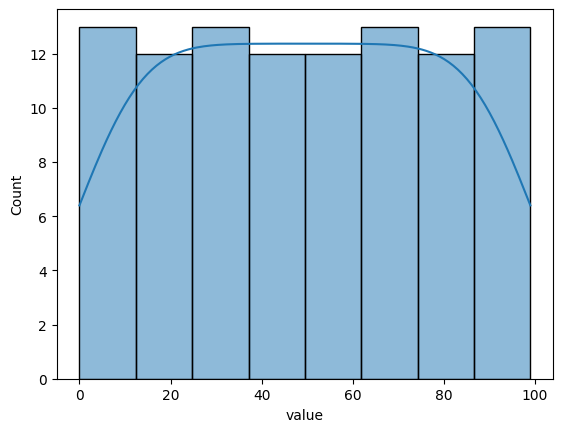

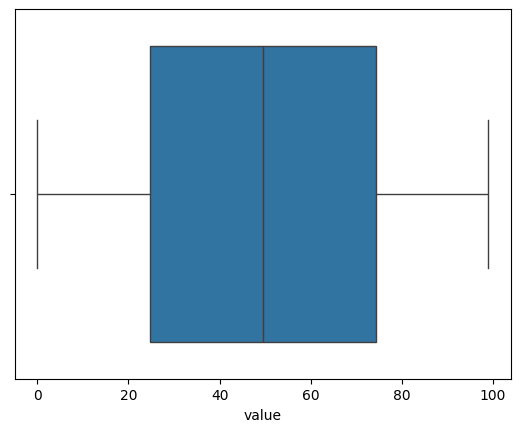

In [6]:
sns.histplot(df['value'], kde=True)
plt.show()

sns.boxplot(x=df['value'])
plt.show()

## **Descriptive Statistics**

In [7]:
df['value'].describe()

,value
count,100.000000
mean,49.500000
std,29.011492
min,0.000000
25%,24.750000
50%,49.500000
75%,74.250000
max,99.000000


## **Rules of Probability**

In [8]:
# P(A or B) = P(A) + P(B) - P(A and B):
P_A = 0.3
P_B = 0.5
P_A_and_B = 0.1

P_A_or_B = P_A + P_B - P_A_and_B
P_A_or_B

0.7000000000000001

## **Probabilities**

In [9]:
# Monte Carlo probability of rolling a 6 on a fair die:
rolls = np.random.randint(1, 7, 100000)
prob_6 = np.mean(rolls == 6)
prob_6

np.float64(0.16434)

## **Discrete Distributions (Binomial, Poisson)**

In [10]:
# Binomial: P(X = 3):
binom.pmf(3, n=10, p=0.5)

# Poisson: P(X = 4):
poisson.pmf(4, mu=2)

np.float64(0.09022352215774178)

## **Continuous Distributions (Normal)**

In [11]:
# PDF and CDF of normal distribution:
pdf_val = norm.pdf(1.0, loc=0, scale=1)
cdf_val = norm.cdf(1.0, loc=0, scale=1)

pdf_val, cdf_val

(np.float64(0.24197072451914337), np.float64(0.8413447460685429))

## **Sampling Distribution & Estimation**

In [12]:
# Sampling distribution of the mean:
data = np.random.normal(50, 10, 1000)
means = [np.mean(np.random.choice(data, 50)) for _ in range(1000)]

np.mean(means), np.std(means)

(np.float64(50.11351181721683), np.float64(1.3620762804182516))

## **Confidence Interval (Mean)**

In [13]:
sample = np.random.normal(100, 15, 30)
mean = np.mean(sample)
se = np.std(sample, ddof=1) / np.sqrt(len(sample))

# 95% CI
ci = t.interval(0.95, df=len(sample)-1, loc=mean, scale=se)
ci

(np.float64(98.55272160456205), np.float64(108.34875989473103))

## **Hypothesis Testing (t-test)**

In [14]:
sample = np.random.normal(100, 10, 30)

# H0: μ = 100:
ttest_1samp(sample, popmean=100)

TtestResult(statistic=np.float64(-0.18360883405334488), pvalue=np.float64(0.8555981094402593), df=np.int64(29))

## **ANOVA (Analysis of Variance)**

In [15]:
group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(52, 5, 30)
group3 = np.random.normal(49, 5, 30)

f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(5.5820557345698605), pvalue=np.float64(0.005237732349629023))

## **Linear Regression**

In [16]:
x = np.arange(1, 50)
y = 2.5 * x + np.random.normal(0, 10, size=len(x))

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     842.8
Date:                Tue, 09 Dec 2025   Prob (F-statistic):           1.15e-31
Time:                        15:43:46   Log-Likelihood:                -171.90
No. Observations:                  49   AIC:                             347.8
Df Residuals:                      47   BIC:                             351.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3377      2.394      0.977      0.334      -2.477       7.153
x1             2.4192      0.083     29.031      0.000       2.252       2.587
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.808
Skew:                           0.349   Prob(JB):                        0.405
Kurtosis:                       2.368   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Time Series (ARIMA)**

In [17]:
# Fake time series:
ts = pd.Series(np.random.normal(0, 1, 200))

model = sm.tsa.ARIMA(ts, order=(1, 0, 1))
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -284.838
Date:                Tue, 09 Dec 2025   AIC                            577.675
Time:                        15:43:59   BIC                            590.868
Sample:                             0   HQIC                           583.014
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1158      0.073     -1.580      0.114      -0.259       0.028
ar.L1         -0.9782      0.108     -9.083      0.000      -1.189      -0.767
ma.L1          0.9671      0.134      7.206      0.000       0.704       1.230
sigma2         1.0103      0.108      9.382      0.000       0.799       1.221
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 3.73
Prob(Q):                              0.49   Prob(JB):                         0.15
Heteroskedasticity (H):               1.03   Skew:                             0.33
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **Statistical Quality Control Chart**

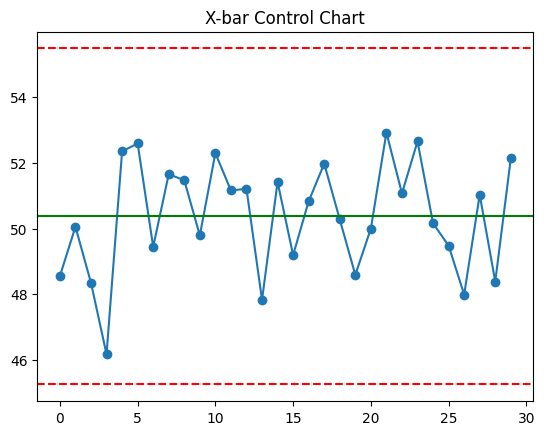

In [18]:
data = np.random.normal(50, 2, 30)
mean = np.mean(data)
std = np.std(data, ddof=1)

UCL = mean + 3*std
LCL = mean - 3*std

plt.plot(data, marker='o')
plt.axhline(mean, color='green')
plt.axhline(UCL, color='red', linestyle='--')
plt.axhline(LCL, color='red', linestyle='--')
plt.title('X-bar Control Chart')
plt.show()